<a href="https://colab.research.google.com/github/sonali6062/Machine_learning_fundamentals/blob/main/Gradient_Boosting(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set a random seed for reproducibility
np.random.seed(42)
# Generate random data for x and calculate y based on a quadratic function with added noise
x=np.random.rand(100,1)-0.5
y=3*x[:,0]**2+0.05*np.random.randn(100)

In [3]:
# Create an empty pandas DataFrame
df=pd.DataFrame()

In [4]:
# Display the generated x values
x

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [5]:
# Display the generated y values
y

array([ 5.15728987e-02,  5.94479790e-01,  1.66051606e-01, -7.01779562e-02,
        3.43985933e-01,  3.72874939e-01,  6.59764984e-01,  3.76341398e-01,
       -9.75194335e-03,  1.04794741e-01,  7.35287787e-01,  6.78883363e-01,
        3.05066318e-01,  2.73909733e-01,  3.08559932e-01,  3.49130363e-01,
        7.98606436e-02, -1.45444646e-02, -5.71096619e-03,  5.75800683e-02,
        5.23392240e-02,  4.02946793e-01,  1.29867214e-01,  4.18481141e-02,
       -6.49789982e-02,  2.22943721e-01,  2.53451786e-01, -3.95060058e-02,
        1.75570720e-02,  6.37324227e-01,  1.29006981e-01,  3.34391950e-01,
        5.80417870e-01,  6.00772381e-01,  5.54501010e-01,  2.84001079e-01,
        1.17538848e-01,  6.08765289e-01,  9.22073759e-02,  2.58225391e-02,
        4.26829699e-01, -5.83641153e-02,  7.07523289e-01,  5.40226226e-01,
        2.14112889e-01,  3.37711060e-02,  1.76497872e-01, -6.88843767e-02,
        3.58884053e-02,  4.07472924e-01,  6.12002352e-01,  1.98779325e-01,
        5.84460527e-01,  

In [6]:
# Add the generated x and y values as columns to the DataFrame
df['x']=x.reshape(100)
df['y']=y

In [7]:
# Display the DataFrame
df

,x,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'X Vs Y')

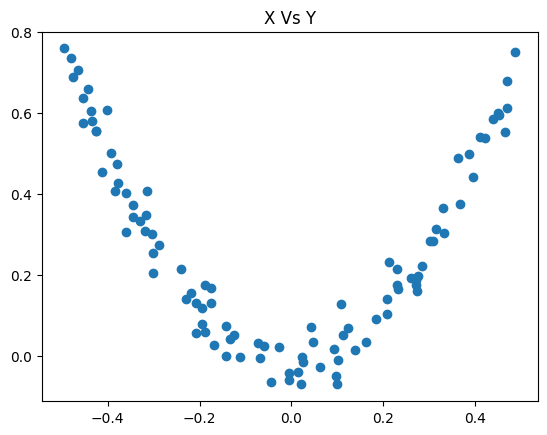

In [8]:
# Create a scatter plot of x versus y
plt.scatter(df['x'],df['y'])
# Set the title of the plot
plt.title('X Vs Y')

STEP1: M1(prediction as the mean of the target values)

In [9]:
# Add a column 'pred1' to the DataFrame with the mean of the 'y' column
df['pred1']=df['y'].mean()

In [10]:
# Display the DataFrame with the new 'pred1' column
df

,x,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


PseudoReciduals=difference between the target and actual values

In [11]:
# Calculate the first residual (difference between actual y and predicted y from model 1)
df['res1']=df['y']-df['pred1']

In [12]:
# Display the DataFrame with the new 'res1' column
df

,x,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


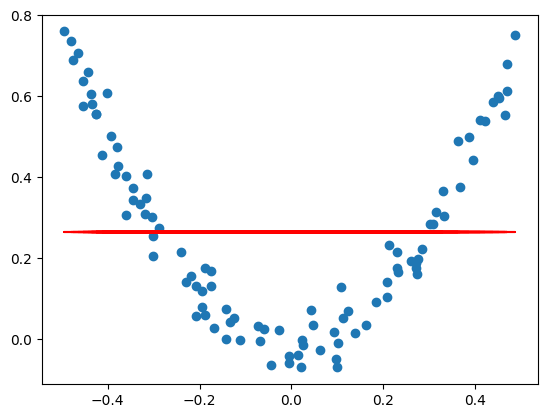

In [13]:
# Create a scatter plot of x versus y
plt.scatter(df['x'],df['y'])
# Plot the prediction from model 1 (mean of y) as a red line
plt.plot(df['x'],df['pred1'],color='red')#line is the mean of the datapoints

In [14]:
# Import the DecisionTreeRegressor from scikit-learn
from sklearn.tree import DecisionTreeRegressor

In [15]:
# Initialize a DecisionTreeRegressor model with a maximum of 8 leaf nodes
tree1=DecisionTreeRegressor(max_leaf_nodes=8)

The target for the decision tree M2 is the res1.
Target of new model is the residual of previous model

In [16]:
# Fit the first decision tree model using x as features and res1 as the target
tree1.fit(df['x'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

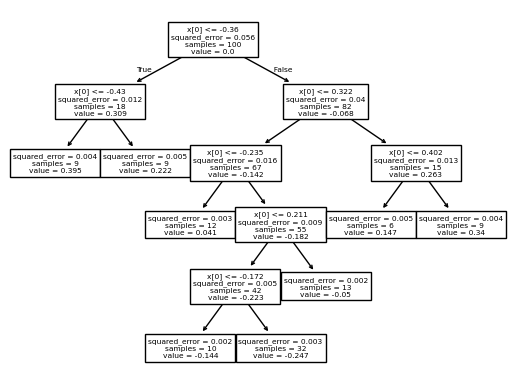

In [17]:
# Import plot_tree for visualizing the decision tree
from sklearn.tree import plot_tree
# Plot the trained decision tree
plot_tree(tree1)
# Display the plot
plt.show()

In [18]:
# Generate a range of x values for testing the model
x_test=np.linspace(-0.5,0.5,500)

In [19]:
# Calculate the predicted y values using the first decision tree model and adding the initial mean prediction
y_pred=0.265458+tree1.predict(x_test.reshape(500,1))

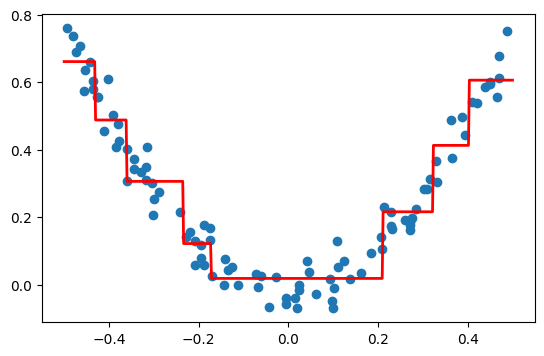

In [20]:
# Create a figure with a specific size
plt.figure(figsize=(14,4))
# Create a subplot (1 row, 2 columns, first plot)
plt.subplot(121)
# Plot the predicted y values from the first decision tree model as a red line
plt.plot(x_test,y_pred,linewidth=2,color='red')
# Scatter plot the original data points
plt.scatter(df['x'],df['y'])

Curve is pointing to all the data points

In [21]:
# Calculate the prediction of the second model (decision tree on residuals)
df['pred2']=0.265458*tree1.predict(df['x'].values.reshape(100,1))

In [22]:
# Display the DataFrame with the new 'pred2' column
df

,x,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,-0.065605
1,0.450714,0.594480,0.265458,0.329021,0.090369
2,0.231994,0.166052,0.265458,-0.099407,-0.013186
3,0.098658,-0.070178,0.265458,-0.335636,-0.065605
4,-0.343981,0.343986,0.265458,0.078528,0.010753
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.065605
96,0.022733,-0.002305,0.265458,-0.267763,-0.065605
97,-0.072459,0.032809,0.265458,-0.232650,-0.065605
98,-0.474581,0.689516,0.265458,0.424057,0.104976


In [23]:
# Calculate the second residual (difference between actual y and predicted y from model 2)
df['res2']=df['y']-df['pred2']

In [24]:
# Display the DataFrame with the new 'res2' column
df

,x,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,-0.065605,0.117178
1,0.450714,0.594480,0.265458,0.329021,0.090369,0.504111
2,0.231994,0.166052,0.265458,-0.099407,-0.013186,0.179238
3,0.098658,-0.070178,0.265458,-0.335636,-0.065605,-0.004573
4,-0.343981,0.343986,0.265458,0.078528,0.010753,0.333233
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.065605,0.024930
96,0.022733,-0.002305,0.265458,-0.267763,-0.065605,0.063300
97,-0.072459,0.032809,0.265458,-0.232650,-0.065605,0.098414
98,-0.474581,0.689516,0.265458,0.424057,0.104976,0.584539


In [25]:
# Initialize a second DecisionTreeRegressor model with a maximum of 8 leaf nodes
tree2=DecisionTreeRegressor(max_leaf_nodes=8)

In [26]:
# Fit the second decision tree model using x as features and res2 as the target
tree2.fit(df['x'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [27]:
# Get the mean of the original 'y' values
res=df['y'].mean()
# Display the mean
res

np.float64(0.26545839669679816)

In model(M2),res2 is the target value for a given decision tree

In [28]:
# Calculate the predicted y values by summing the initial mean prediction and the predictions from both decision trees
y_pred = 0.26545 + tree1.predict(x_test.reshape(-1,1)) + tree2.predict(x_test.reshape(-1,1))

# Check m3 part

Text(0.5, 1.0, 'X vs y')

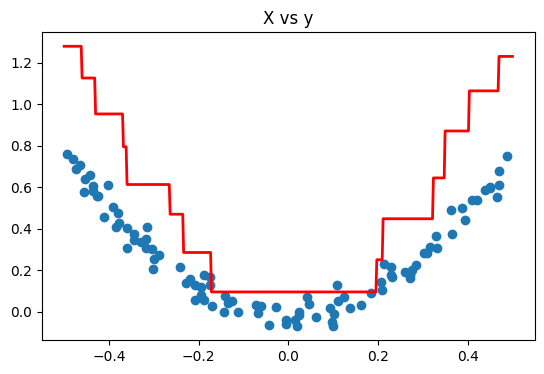

In [29]:
# Create a figure with a specific size
plt.figure(figsize=(14,4))
# Create a subplot (1 row, 2 columns, first plot)
plt.subplot(121)
# Plot the combined predicted y values as a red line
plt.plot(x_test, y_pred, linewidth=2,color='red')
# Scatter plot the original data points
plt.scatter(df['x'],df['y'])
# Set the title of the plot
plt.title('X vs y')

**Conclusion**: Here, we have intentionally used 3 models (m1 -> mean of target, m2 -> target is the res1 and m3 -> target is the res2)